# Herramientas

Puedes ejecutar un Cell (celda) pulsando [shift] + [Enter] o presionando el botón Play en la barra de herramientas

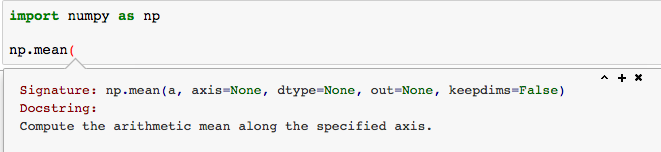![image.png](attachment:0d256d89-28ae-4375-b536-2b0d65fd639f.png

Se puede obtener ayuda ejecutando **name_func**?

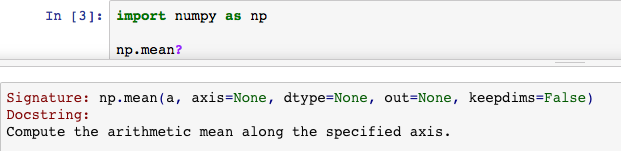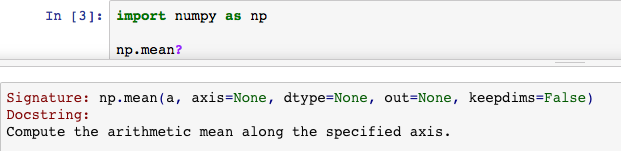
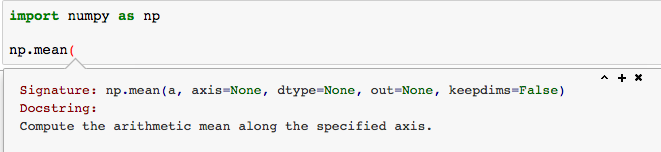

## Numpy - Matrices

In [ ]:
import numpy as np

#Semilla de números aleatorios (para reproducibilidad)
rnd = np.random.RandomState(seed=123)

# Generar una matriz aleatoria
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))

print(X)

In [ ]:
# Acceder a los elementos de la Matriz

print(X[:,1])

In [ ]:
# Matriz Transpuesta
matrizT = X.T
print(matrizT)

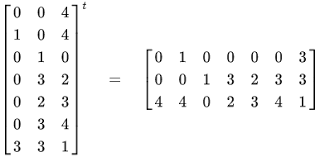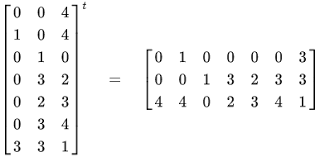

In [ ]:
# Crear un vector fila de números con la misma separación en un intervalo definido
y = np.linspace(0, 12, 5)
print(y)

In [ ]:
# Transformar el vector fila en un vector columna
print(y[:, np.newaxis])

In [ ]:
# Rechape

rnd = np.random.RandomState(seed=123)
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))

print(X)
print(X.shape)

print()

print(X.reshape(5,3))

In [ ]:
# Indexar según un conjunto de números enteros
indices = np.array([3, 1, 0])

X[:, indices]

## SciPy - Matrices Dispersas

In [ ]:
from scipy import sparse
import numpy as np

# Crear matriz aleatoria entre 0 y 1
rnd = np.random.RandomState(seed=123)

X = rnd.uniform(low=0.0, high=1.0, size=(10,5))
print(X)

In [ ]:
# Cualquier valor menos que 0.7 se convierte en cero
X[X<0.7] = 0
print(X)

In [ ]:
# Se transforma la matriz X a una de tipo CSR (Compressed-Sparse-Row)
X_csr = sparse.csr_matrix(X)
print(X_csr)

In [ ]:
# Para convertirla nuevamente a una matrix densa
X_dense = X_csr.toarray()
print(X_dense)

Existen formas alternativas para convertir matrices dispersas a densas (**numpy.todense**). Pero cuando se usa **toarray** se retorna un array de numpy, mientras que **todense** devuelve una matrix numpy que no es compatible con **scikit-learn**.

**CSR** es muy eficiente para cálculo computacional pero no lo es para agregar elementos a la matrix. En este caso, es recomendable utilizar **LIL** (List-In-List).

In [ ]:
# Creacion de una matriz tipo LIL sin datos y agregar elementos

X_lil = sparse.lil_matrix((5,5))

for i, j in np.random.randint(0, 5, (15, 2)):
    X_lil[i, j] = i + j
    
print(X_lil)
print(type(X_lil))

In [ ]:
# Transformar la matrix LIL a Dense
X_dense = X_lil.toarray()
print(X_dense)
print(type(X_dense))

Debido a que muchos algoritmos de **scikit-learn** requieren el formato **CSR** es necesario convertir el formato **LIL**.

In [ ]:
X_csr = X_lil.tocsr()
print(X_csr)
print(type(X_csr))

Lista de formatos dispersos disponibles:
- CSR (compressed sparse row).
- CSC (compressed sparse column).
- BSR (block sparse row).
- COO (coordinate).
- DIA (diagonal).
- DOK (dictionary of keys).
- LIL (list in list).

## Matplotlib

La herramienta más habitual para la visualización de datos en Python es **Matplotlib**. 

En los Notebooks pueden usarse las [funciones mágicas](https://ipython.org/ipython-doc/3/interactive/magics.html). El modeo **%matplotlib inline** permite graficar directamente en el notebook.

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Dibujar una línea
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

In [ ]:
# Dibujar un scatter
# A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates 
# to display values for typically two variables for a set of data.

x = np.random.normal(size=500)
y = np.random.normal(size=500)

plt.scatter(x, y)

In [ ]:
# Mostrar imagenes con imshow
# El origen está arriba a la izquierda

x = np.linspace(1, 12, 100)
y = x[:, np.newaxis]

im = y * np.sin(x) * np.cos(y)
print(im.shape)
plt.imshow(im);

In [ ]:
from PIL import Image
from numpy import asarray

imagen = Image.open('images/koala.jpg')
data = asarray(imagen)
plt.imshow(data)

In [ ]:
# Para hacer el diagrama de curvas de nivel (contour plot)
# Origen abajo izquierda

plt.contour(im)

In [ ]:
# Si se usa el modo widget de las funciones mágicas se puede trabajar con plots interactivos.

%matplotlib widget

# Plot en 3D
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection='3d')
xgrid, ygrid = np.meshgrid(x, y.ravel())

ax.plot_surface(xgrid, ygrid, im, cmap=plt.cm.viridis, cstride=2, rstride=2, linewidth=0);

https://matplotlib.org/stable/gallery/index.html

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axs[0, 0].set_title("Signal")
axs[0, 0].plot(t, s, color='C0')
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axs[1, 0].set_title("Magnitude Spectrum")
axs[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axs[1, 1].set_title("Log. Magnitude Spectrum")
axs[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs[2, 0].set_title("Phase Spectrum ")
axs[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axs[2, 1].set_title("Angle Spectrum")
axs[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axs[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

## Pandas

Estructuras de Datos:

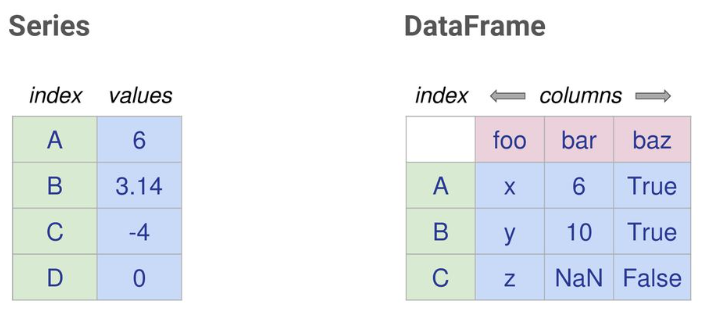

### Creación de Series

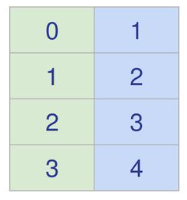

In [ ]:
import pandas as pd

s1 = pd.Series([1, 2, 3, 4])
print(s1)

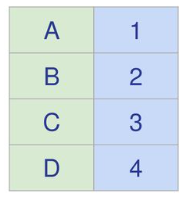

In [ ]:
s2 = pd.Series([1, 2, 3, 4], index=['A', 'B', 'C', 'D'])
print(s2)

### Creación de Dataframes

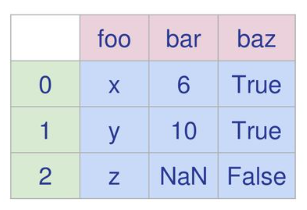

In [ ]:
df = pd.DataFrame({'foo': ['x', 'y', 'z'], 'bar': [6, 10, None], 'baz': [True, True, False],})
print(df)

### Selección de Columnas

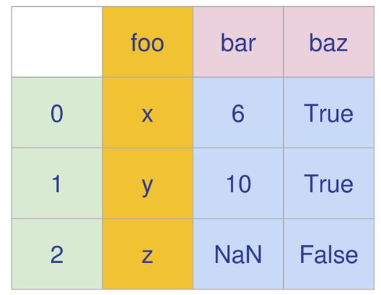

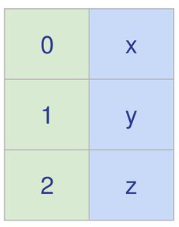

In [ ]:
df['foo']

In [ ]:
type(df['foo'])

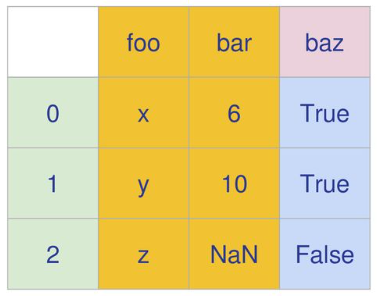

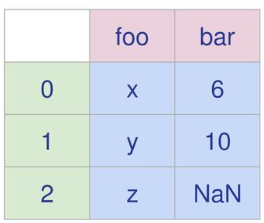

In [ ]:
df[ ['foo', 'bar'] ]

In [ ]:
type(df[ ['foo', 'bar'] ])

## Selección de Filas

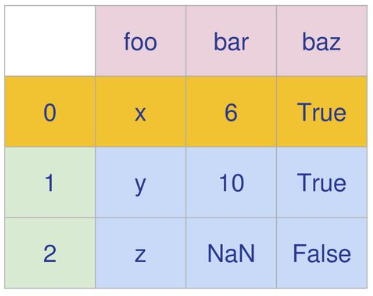

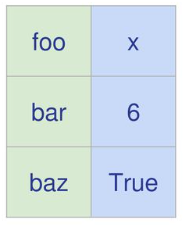

In [ ]:
df.loc[0]

In [ ]:
print(type(df.loc[0]))

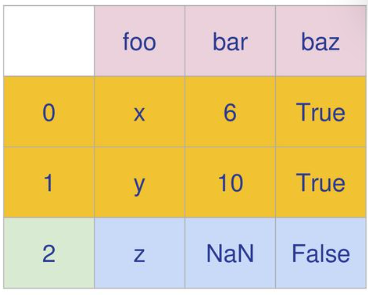

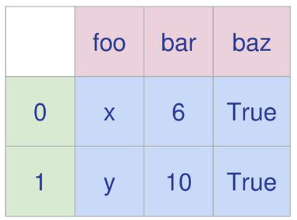

In [ ]:
df.loc[0:1]

In [ ]:
print(type(df.loc[0:2]))

## Filtros Condicionales

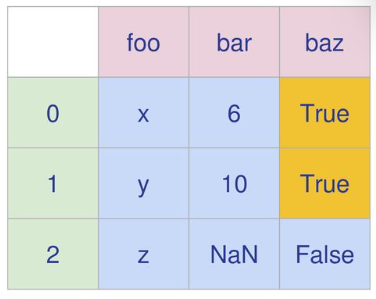

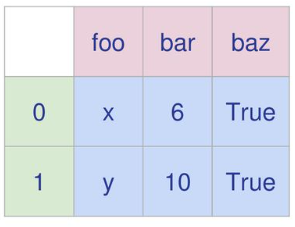

In [ ]:
df[(df['baz'])]

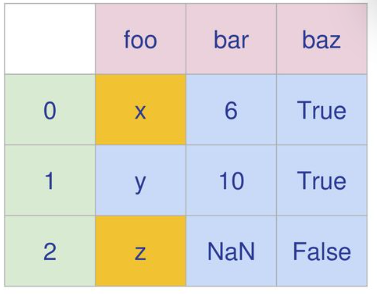

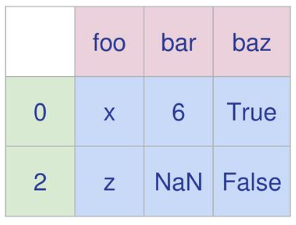

In [ ]:
df[ (df['foo'] == 'x') | (df['foo'] == 'z')]

### Alineamiento de Datos

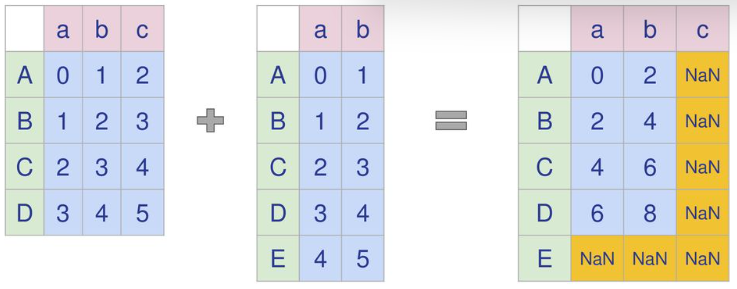

In [ ]:
dfA = pd.DataFrame({'a':[0, 1, 2, 3], 'b':[1, 2, 3, 4], 'c':[2, 3, 4, 5]}, index=['A', 'B', 'C', 'D'])
dfB = pd.DataFrame({'a':[0, 1, 2, 3, 4], 'b':[1, 2, 3, 4, 5]}, index=['A', 'B', 'C', 'D', 'E'])

nuevo_df = dfA + dfB
print(nuevo_df)

## Manejo de valores perdidos

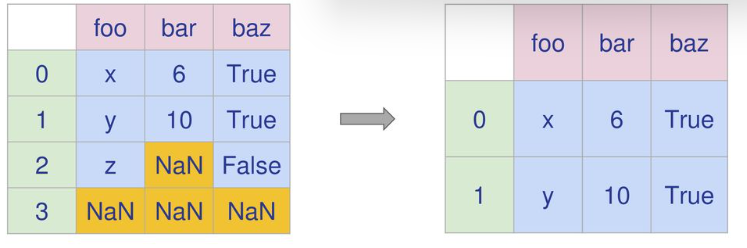

In [ ]:
df = pd.DataFrame({'foo': ['x', 'y', 'z', None], 'bar': [6, 10, None, None], 'baz': [True, True, False, None],})
print(df)

In [ ]:
new_df = df.dropna()
print(new_df)

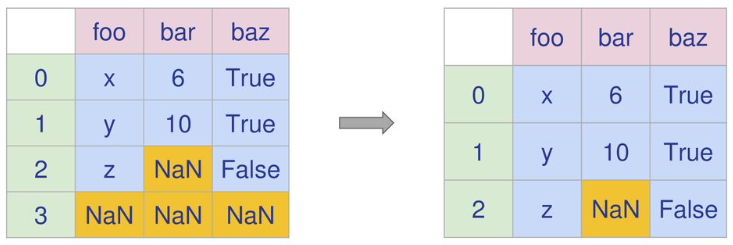

In [ ]:
new_df = df.dropna(how='all')
print(new_df)

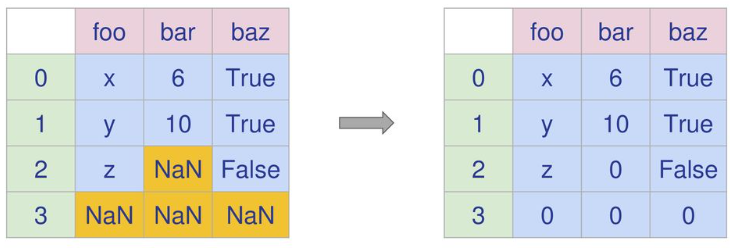

In [ ]:
new_df = df.fillna(0)
print(new_df)

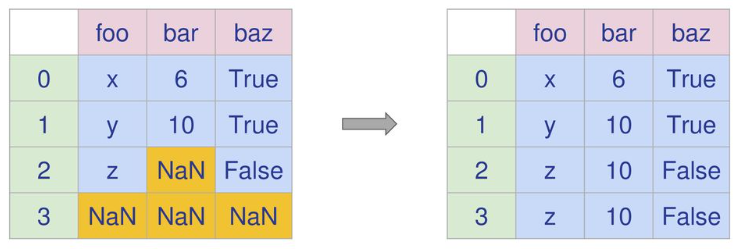

In [ ]:
new_df = df.fillna(method='ffill')
print(new_df)

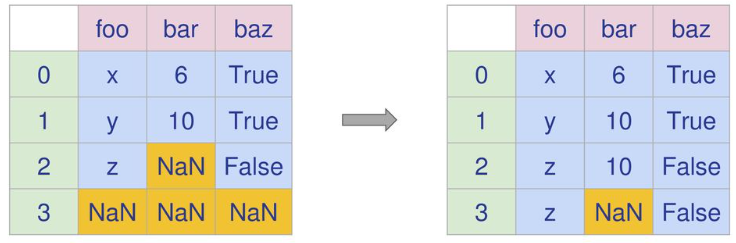

In [ ]:
new_df = df.fillna(method='ffill', limit=1)
print(new_df)

## Indexado

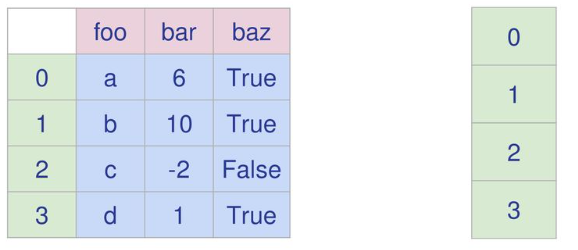

In [ ]:
df = pd.DataFrame({'foo':['a', 'b', 'c', 'd'], 'bar':[6, 10, -2, 1], 'baz':[True, True, False, True]})
print(df)

In [ ]:
ix = df.index
print(ix)

In [ ]:
for i in ix:
    print(df.loc[i])

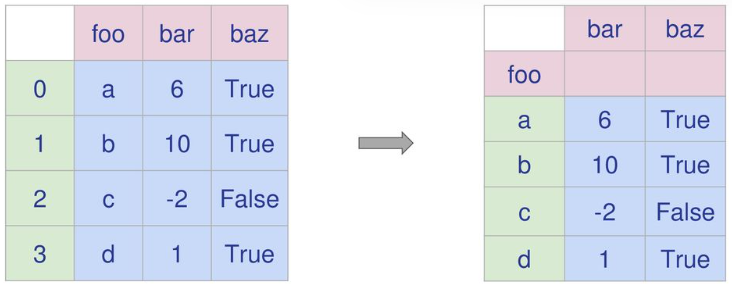

In [ ]:
print(df)

In [ ]:
df = df.set_index('foo')
print(df)

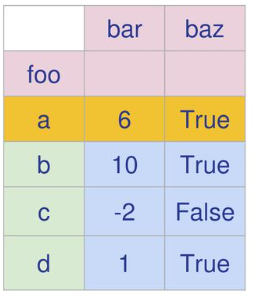

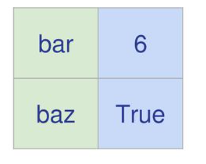

In [ ]:
df.loc['a']

In [ ]:
df.iloc[0]

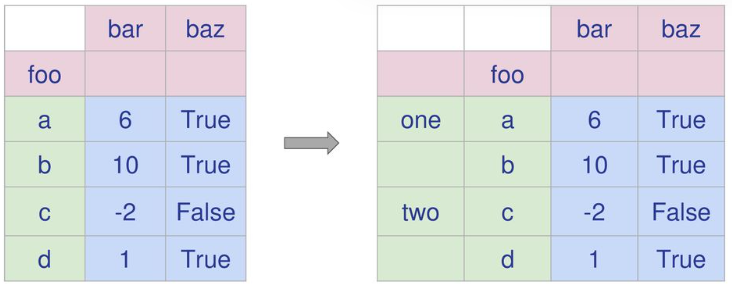

In [ ]:
df = df.set_index( [['one', 'one', 'two', 'two'], df.index] )
print(df)

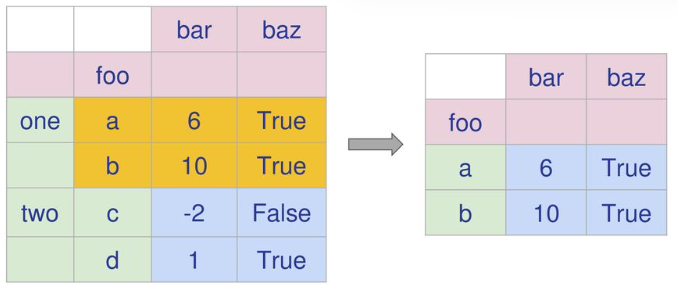

In [ ]:
one = df.loc['one']
print(one)

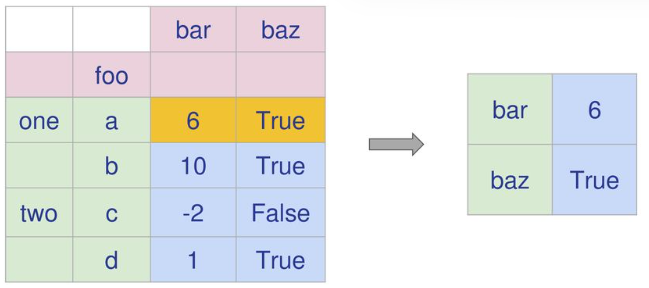

In [ ]:
one = df.loc['one', 'a']
print(one)

## Transposición de Datos

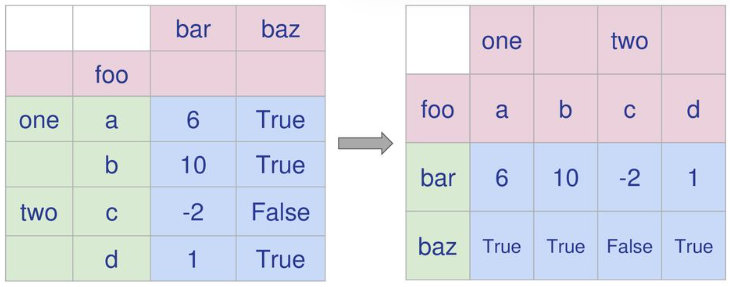

In [ ]:
new_df = df.T
print(new_df)

## Estadísticas

In [ ]:
df

[Pandas describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

Genera estadísticas descriptivas.

Las estadísticas descriptivas incluyen aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores de NaN.

In [ ]:
df.describe()

[Pandas cov()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html?highlight=cov#pandas.DataFrame.cov)

Calcula la covarianza por pares de las columnas, excluyendo NA/valores nulos.

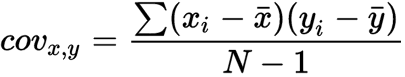

In [ ]:
df.cov()

[Panda corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr)

Correlación

In [ ]:
df.corr()

[Pandas rank()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html?highlight=rank#pandas.DataFrame.rank)

Pandas Rank calculará el rango de su punto de datos dentro de un conjunto de datos más grande. Es extremadamente útil para filtrar el "primero" o el segundo de un subconjunto de datos.

In [ ]:
df

In [ ]:
df.rank()

[Pandas cumsum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html)

In [ ]:
df.cumsum()